In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from Data.Featurisation import data_handeler
import numpy as np
import scienceplots
plt.rcdefaults()
plt.style.use(['science'])
avg_rmse = pd.read_pickle("evaluation/target/avg_rmse.pkl")
avg_times = pd.read_pickle("evaluation/target/avg_times.pkl")

rmse = pd.read_pickle("evaluation/target/rmse.pkl")
time = pd.read_pickle("evaluation/target/times.pkl")
time = time.loc[:,(slice(None), 'Training Time')]
sites = range(4)
models = [0,1,5,6,2,3,4,8,9]
model_labels = ["A", "B", "C", "D", "E", "F", "G", "H", "I"]
import itertools
 
print(time)

one                0             1             2             3             4   \
two     Training Time Training Time Training Time Training Time Training Time   
one two                                                                         
0   0        2.920837      0.967775      2.223181      1.989337      2.117579   
    1         5.02733      1.878347      4.002256      3.818203      5.222033   
    2         5.95365      2.336537      5.946898      5.727289      6.192387   
    3        7.845166      3.078512       7.95097      7.629888      8.097976   
    4       10.295493      4.165633      9.943014      9.567453     10.598113   
    5       11.984792      4.628325     11.871365     11.499167     12.325955   
    6       14.393975      5.390774     13.852081     13.439379     14.712366   
    7       15.392888      6.479703     15.824379     15.864573     15.677083   
    8       17.329535      7.002849     18.097751     17.814586     17.599782   
    9       19.976144      7

## RMSE target

In [16]:
#AVG RMSE
avg_rmse = pd.DataFrame(index=models, columns=sites)
for site in sites:
    _,_, eval_data = data_handeler(site, "nwp", "nwp", "nwp", transform=True)
    for model in models:  
        with open(f"DA_forecasts/DA_{model}_{site}", 'rb') as f:
            DA_forecast = pickle.load(f)
        
        power = eval_data['P']
        if model in [3,4]:
            DA_forecast = DA_forecast[31*24:] #(30 days + 1 lag day)*24
            power = power[31*24:] 
        avg_rmse.loc[model, site] = np.sqrt(np.mean(np.square(DA_forecast-power)))
        
     

Not in Colab environment: Using .pkl files


c:\Users\Robbe\SolNet-2\Data\Featurisation.py:226: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[dataset>inverter_rating] = inverter_rating


Not in Colab environment: Using .pkl files


c:\Users\Robbe\SolNet-2\Data\Featurisation.py:226: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[dataset>inverter_rating] = inverter_rating


Not in Colab environment: Using .pkl files


c:\Users\Robbe\SolNet-2\Data\Featurisation.py:226: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[dataset>inverter_rating] = inverter_rating


Not in Colab environment: Using .pkl files


c:\Users\Robbe\SolNet-2\Data\Featurisation.py:226: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[dataset>inverter_rating] = inverter_rating


In [18]:
avg_rmse

,0,1,2,3
0,0.46373,0.458347,0.267702,0.283559
1,0.459429,0.453477,0.264987,0.233841
5,0.40072,0.438929,0.28749,0.380228
6,0.409599,0.446766,0.289646,0.398686
2,0.190365,0.203185,0.185539,0.106987
3,0.397642,0.341714,0.221584,0.409388
4,-0.720163,-0.661,-0.782859,-0.550259
8,0.220077,0.31888,-0.170937,0.260887
9,0.0,0.0,0.0,0.0


In [19]:
1-avg_rmse/avg_rmse.loc[9]

,0,1,2,3
0,0.46373,0.458347,0.267702,0.283559
1,0.459429,0.453477,0.264987,0.233841
5,0.40072,0.438929,0.28749,0.380228
6,0.409599,0.446766,0.289646,0.398686
2,0.190365,0.203185,0.185539,0.106987
3,0.397642,0.341714,0.221584,0.409388
4,-0.720163,-0.661,-0.782859,-0.550259
8,0.220077,0.31888,-0.170937,0.260887
9,0.0,0.0,0.0,0.0


C:\Users\Robbe\AppData\Local\Temp\ipykernel_20908\805848203.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\Robbe\AppData\Local\Temp\ipykernel_20908\805848203.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\Robbe\AppData\Local\Temp\ipykernel_20908\805848203.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\Robbe\AppData\Local\Temp\ipykernel_20908\805848203.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


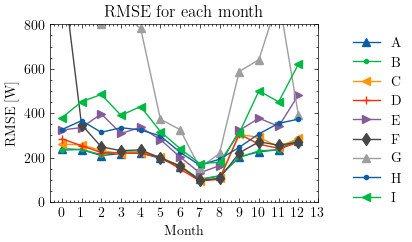

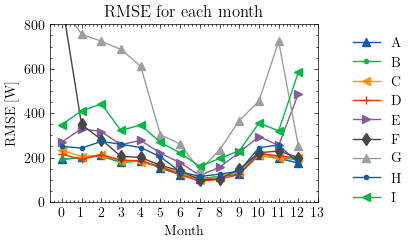

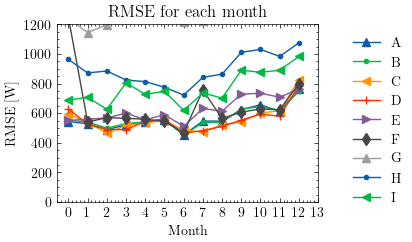

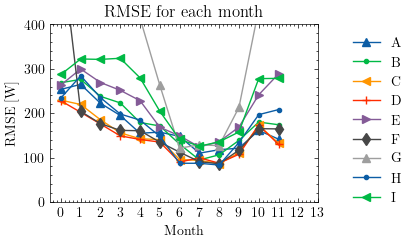

In [72]:
ymax = [800, 800, 1200, 400]
for j, site in enumerate(sites):
    #RMSE
    marker = itertools.cycle(('^', '.', '<', '+', '>', 'd'))
    fig = plt.figure(site)
    for i, model in enumerate(models):
        if i <= 6:
            fmt = "^-"
        else:
            fmt=""
        plt.plot(rmse.loc[(site, slice(None)), model].values, marker=next(marker), linestyle="-", label = model_labels[i])
    plt.ylim([0, ymax[j]])
    fig.legend(loc="center left", bbox_to_anchor=(1,0.5))
    plt.title("RMSE for each month")
    plt.xlabel("Month")
    plt.ylabel("RMSE [W]")
    plt.xticks(range(len(rmse.loc[site].index)+1), labels=range(len(rmse.loc[site].index)+1))
    plt.tight_layout()
    plt.savefig(f"Figures/evaluation/rmse_month_s{site}")
    fig.show()

## Time Target

C:\Users\Robbe\AppData\Local\Temp\ipykernel_20908\2213294375.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\Robbe\AppData\Local\Temp\ipykernel_20908\2213294375.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\Robbe\AppData\Local\Temp\ipykernel_20908\2213294375.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\Robbe\AppData\Local\Temp\ipykernel_20908\2213294375.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


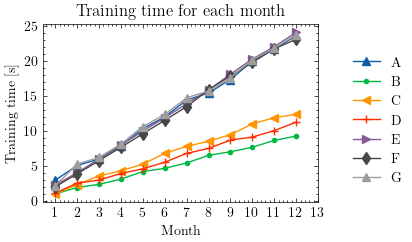

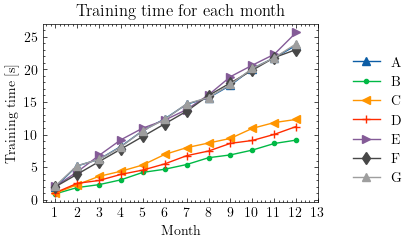

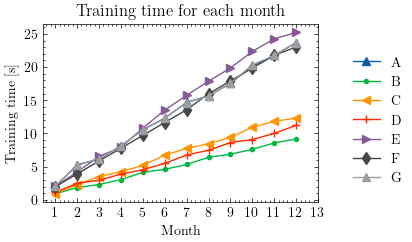

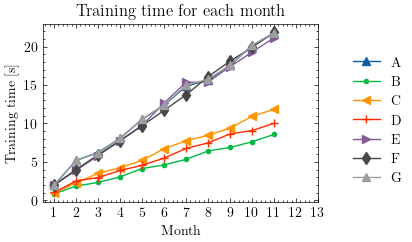

In [73]:
# ymax = [800, 800, 1200, 400]
for j, site in enumerate(sites):
    marker = itertools.cycle(('^', '.', '<', '+', '>', 'd'))
    #RMSE
    fig = plt.figure(site)
    for i, model in enumerate(models):
        if i <=6: 
            plt.plot(time.loc[(site, slice(None)), model].values, marker=next(marker), linestyle="-", label = model_labels[i])
    # plt.ylim([0, ymax[j]])
    fig.legend(loc="center left", bbox_to_anchor=(1,0.5))
    plt.xlabel("Month")
    plt.ylabel("Training time [s]")
    plt.title("Training time for each month")
    plt.xticks(range(len(rmse.loc[site].index)), labels=range(1,len(rmse.loc[site].index)+1))
    plt.tight_layout()
    plt.savefig(f"Figures/evaluation/time_month_{site}")
    fig.show()

## Skill score target

C:\Users\Robbe\AppData\Local\Temp\ipykernel_20908\425427791.py:27: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\Robbe\AppData\Local\Temp\ipykernel_20908\425427791.py:27: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\Robbe\AppData\Local\Temp\ipykernel_20908\425427791.py:27: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


[0.11684319658622122 0.17756098349750038 0.3075705717574754
 0.3978188769639439 0.44613820567305196 0.23051351392774
 -0.04880905015939163 0.12442098832015702 0.1309802742698043
 0.23157781567248448 0.42001813762498075 0.49148294523088265 nan]
[0.06468498335751638 0.14274525139935346 0.2592357331002719
 0.3106413044840345 0.3597453197659528 0.16234931766354554
 0.07467341921632664 0.24592428441387193 0.21590929975321527
 0.11991727438082012 0.3521360361766246 0.37519971647778305 nan]
[0.2014733143781683 0.3183161432970054 0.4233965155905206
 0.5186597775843477 0.4907098789796501 0.31261871348960313
 0.3210979635949607 0.2548753211539898 0.3606437836878813
 0.2981337128057505 0.3794808010660986 0.5238633341317904 nan]
[0.2063930583965845 0.37291598788814173 0.4531626924802248
 0.5399105959390742 0.49650694844358734 0.3399677498019411
 0.3618248902665744 0.20773699425864434 0.35516904417017314
 0.3187004528460289 0.37685598619499505 0.5344388364696423 nan]
[0.08225047268232588 0.06986077

C:\Users\Robbe\AppData\Local\Temp\ipykernel_20908\425427791.py:27: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


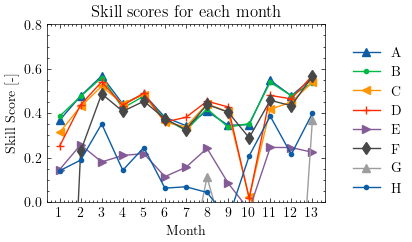

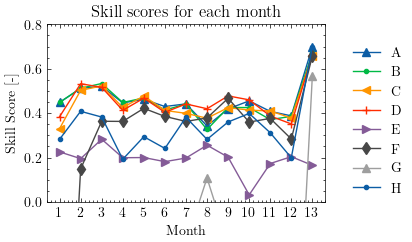

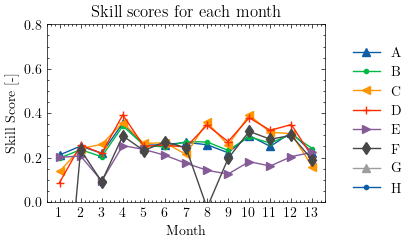

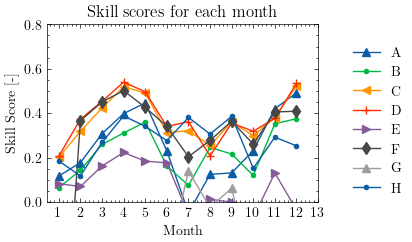

In [85]:
avg_skill_scores = pd.DataFrame(index=sites, columns=models)
for j, site in enumerate(sites):
    marker = itertools.cycle(('^', '.', '<', '+', '>', 'd'))
    persist = rmse.loc[(site, slice(None)), 9].values
    fig = plt.figure(site)
    for i, model in enumerate(models):
        if model != 9:
            rmse_mod_site = rmse.loc[(site, slice(None)), model].values
            ss = 1-  rmse_mod_site/persist
            if model in [3,4]:
                ss_avg = ss[1:]
            else:
                ss_avg = ss
            
            avg_skill_scores.loc[site, model] = np.nanmean(ss)

            plt.plot(ss, marker=next(marker), linestyle="-", label = model_labels[i])
    plt.ylim([0, 0.8])
    fig.legend(loc="center left", bbox_to_anchor=(1,0.5))
    plt.xlabel("Month")
    plt.ylabel("Skill Score [-]")
    plt.title("Skill scores for each month")
    plt.xticks(range(len(rmse.loc[site].index)), labels=range(1,len(rmse.loc[site].index)+1))
    plt.tight_layout()
    plt.savefig(f"Figures/evaluation/ss_month_{site}")
    fig.show()

In [86]:
avg_skill_scores

,0,1,5,6,2,3,4,8,9
0,0.442467,0.437073,0.397189,0.408383,0.175904,0.235258,-0.605358,0.182586,NaN
1,0.459512,0.451612,0.440994,0.4552,0.193442,0.229334,-0.528292,0.34112,NaN
2,0.2603,0.258614,0.271383,0.275514,0.186074,0.140297,-0.752308,-0.174948,NaN
3,0.252176,0.223597,0.366939,0.380299,0.073106,0.247963,-0.458648,0.278651,NaN


## nRMSE Source

In [75]:
#nRMSE
metrics =  pd.read_pickle("evaluation/source/metrics.pkl")
rmse_source = metrics.loc[:, (slice(None), "rmse")]
print(rmse_source)

lags = 24
forecast_period = 24
train_test_split = 0.8
source_models = [0,1,2,5,6]
for i in source_models:
    for j in range(4):
        rmse = rmse_source.loc[i,j].values
        if i <=4:
            data_name = "nwp"
        else: 
            data_name = "era5"
        if i in [1,6]:
            phys = True
        else:
            phys = False
        source_data,_, _ = data_handeler(j, data_name, "nwp", "nwp", phys)
        length = len(source_data.index)

        prediction_len = length - lags  # See how much data is used for predictions

        # The number of windows we have to predict depends on the length of the forecast window 
        # (we assume that the forecaster wants to forecast every upcoming period)
        windows = int(prediction_len / forecast_period)  # Get the number of predictions we can make.
        train_len = round(windows * train_test_split)  # Split the features into a train set...
        test_len = windows - train_len  # ... and a test set
        test = source_data.iloc[train_len*forecast_period+lags:]
        test_power = test['P']
        denominator = (test_power**2).mean()
        print(denominator)
        nRMSE = rmse/denominator


one           0           1           2           3    4
two        rmse        rmse        rmse        rmse rmse
0    214.510798  163.818526  260.551767  170.368425  NaN
1     224.40215  164.172116  267.011164  168.338852  NaN
2    337.942533  239.791864  286.400358  231.885139  NaN
3      0.006426         NaN    0.001757    0.007765  NaN
4      0.005625         NaN     0.11291    0.005019  NaN
5    236.459202  173.079215  222.505591  177.363527  NaN
6    233.906099  168.338706  212.568593  172.529857  NaN
7       0.00589         NaN    0.110027    0.004545  NaN
8      0.005885         NaN    0.110027    0.004646  NaN
9           NaN         NaN         NaN         NaN  NaN
10          NaN         NaN         NaN         NaN  NaN
11          NaN         NaN         NaN         NaN  NaN
Not in Colab environment: Using .pkl files
435124.5376243452
Not in Colab environment: Using .pkl files
251545.0664993452
Not in Colab environment: Using .pkl files
2837036.9540125867
Not in Colab envir

c:\Users\Robbe\SolNet-2\Data\Featurisation.py:226: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[dataset>inverter_rating] = inverter_rating


432877.98395425593
Not in Colab environment: Using .pkl files


c:\Users\Robbe\SolNet-2\Data\Featurisation.py:226: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[dataset>inverter_rating] = inverter_rating


250906.60622348217
Not in Colab environment: Using .pkl files


c:\Users\Robbe\SolNet-2\Data\Featurisation.py:226: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[dataset>inverter_rating] = inverter_rating


2837036.9540125867
Not in Colab environment: Using .pkl files


c:\Users\Robbe\SolNet-2\Data\Featurisation.py:226: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[dataset>inverter_rating] = inverter_rating


195038.26708836306
Not in Colab environment: Using .pkl files
435124.5376243452
Not in Colab environment: Using .pkl files
251545.0664993452
Not in Colab environment: Using .pkl files
2837036.9540125867
Not in Colab environment: Using .pkl files
195038.26708836306
Not in Colab environment: Using .pkl files
408529.4456505995
Not in Colab environment: Using .pkl files
238163.1399658873
Not in Colab environment: Using .pkl files
2836269.6840755707
Not in Colab environment: Using .pkl files
195488.55370070922
Not in Colab environment: Using .pkl files


c:\Users\Robbe\SolNet-2\Data\Featurisation.py:226: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[dataset>inverter_rating] = inverter_rating


406542.8642336331
Not in Colab environment: Using .pkl files


c:\Users\Robbe\SolNet-2\Data\Featurisation.py:226: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[dataset>inverter_rating] = inverter_rating


237930.62764385494
Not in Colab environment: Using .pkl files


c:\Users\Robbe\SolNet-2\Data\Featurisation.py:226: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[dataset>inverter_rating] = inverter_rating


2836269.6840755707
Not in Colab environment: Using .pkl files


c:\Users\Robbe\SolNet-2\Data\Featurisation.py:226: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[dataset>inverter_rating] = inverter_rating


195488.55370070922
